# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# pip install citipy

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
response = requests.get(query_url + city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -15.4311, 'lon': -74.6158},
 'dt': 1669838283,
 'id': 3948613,
 'main': {'feels_like': 78.64,
          'grnd_level': 993,
          'humidity': 54,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 78.55,
          'temp_max': 78.55,
          'temp_min': 78.55},
 'name': 'Acarí',
 'sys': {'country': 'PE', 'sunrise': 1669803506, 'sunset': 1669850176},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 194, 'gust': 8.61, 'speed': 11.43}}


In [5]:
found_cities = []
temps = []
lats = []
lons = []
hums = []
clouds = []
wnd_speed = []
country = []
date = []
count = 0
notFound = 0

# test_cities = [cities[0],cities[1],cities[2],cities[3],cities[4],cities[5]]

print("Beginning Data Retrieval...")
print("------------------------------")

for city in cities:

    try:

        response = requests.get(query_url + city).json()
        temps.append(response['main']['temp_max'])
        hums.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        wnd_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(city)

        print(f"Processing record {count} | {city}")
        count = count + 1
        
    except:
        print(f"{city} not found. Skipping...")
        notFound = notFound + 1
            
print(f"{notFound} cities were not found...")

Beginning Data Retrieval...
------------------------------
Processing record 0 | monywa
Processing record 1 | kargil
Processing record 2 | albany
Processing record 3 | boli
Processing record 4 | mount pleasant
Processing record 5 | ushuaia
Processing record 6 | puerto ayora
Processing record 7 | soyo
Processing record 8 | qaanaaq
Processing record 9 | terrasini
tsihombe not found. Skipping...
Processing record 10 | bathsheba
Processing record 11 | severnoye
Processing record 12 | port hedland
sentyabrskiy not found. Skipping...
Processing record 13 | rikitea
Processing record 14 | busselton
Processing record 15 | longyearbyen
Processing record 16 | rabaul
Processing record 17 | gannan
Processing record 18 | dingle
Processing record 19 | constitucion
Processing record 20 | navoi
Processing record 21 | cayenne
Processing record 22 | tiksi
Processing record 23 | victoria
Processing record 24 | upernavik
Processing record 25 | mataura
Processing record 26 | carnarvon
Processing record 27 |

Processing record 221 | rock hill
Processing record 222 | esperance
Processing record 223 | renigunta
Processing record 224 | ciortesti
Processing record 225 | torbay
Processing record 226 | erenhot
Processing record 227 | kayerkan
Processing record 228 | manta
Processing record 229 | rio bonito
Processing record 230 | port lincoln
Processing record 231 | lasa
Processing record 232 | klaksvik
Processing record 233 | kuching
Processing record 234 | kulhudhuffushi
amderma not found. Skipping...
Processing record 235 | champerico
jaramana not found. Skipping...
Processing record 236 | rio gallegos
Processing record 237 | mayo
Processing record 238 | ostrovnoy
Processing record 239 | bracebridge
Processing record 240 | mwanza
Processing record 241 | ballina
Processing record 242 | ancud
Processing record 243 | dicabisagan
Processing record 244 | vila franca do campo
Processing record 245 | bacolod
Processing record 246 | sur
Processing record 247 | makakilo city
chom bung not found. Skippi

mahadday weyne not found. Skipping...
Processing record 452 | san rafael del sur
Processing record 453 | mbinga
Processing record 454 | kahului
Processing record 455 | barma
Processing record 456 | barrancabermeja
Processing record 457 | ahtopol
Processing record 458 | donskoye
Processing record 459 | kifri
Processing record 460 | whakatane
Processing record 461 | boras
Processing record 462 | clyde river
Processing record 463 | sauda
Processing record 464 | magistralnyy
Processing record 465 | daoukro
Processing record 466 | adrar
Processing record 467 | rawlins
Processing record 468 | olinala
Processing record 469 | nieuw nickerie
Processing record 470 | atambua
Processing record 471 | narsaq
Processing record 472 | wellington
tasbuget not found. Skipping...
Processing record 473 | dolores
mendahara not found. Skipping...
Processing record 474 | coihaique
Processing record 475 | maine-soroa
Processing record 476 | cedar city
ijaki not found. Skipping...
Processing record 477 | mnogov

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print(f"Cities :  {len(found_cities)}")
print(f"Lat : {len(lats)}")
print(f"Lon : {len(lons)}")
print(f"Max Temp : {len(temps)}")
print(f"Humidity : {len(hums)}")
print(f"Wind Speed : {len(wnd_speed)}")
print(f"Cloudiness : {len(clouds)}")
print(f"Country : {len(country)}")
print(f"Date : {len(date)}")            

Cities :  562
Lat : 562
Lon : 562
Max Temp : 562
Humidity : 562
Wind Speed : 562
Cloudiness : 562
Country : 562
Date : 562


In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": found_cities,
    "Lat": lats,
    "Lng": lons,
    "Max Temp": temps,
    "Humidity": hums,
    "Cloudiness": clouds,
    "Wind Speed": wnd_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monywa,22.1167,95.1333,71.17,64,2,6.53,MM,1669838284
1,kargil,34.5667,76.1000,25.36,41,100,2.64,IN,1669838285
2,albany,42.6001,-73.9662,52.95,91,100,5.99,US,1669838286
3,boli,45.7667,130.5167,-0.38,76,98,14.07,CN,1669838286
4,mount pleasant,32.7941,-79.8626,69.10,83,0,9.22,US,1669838082
...,...,...,...,...,...,...,...,...,...
557,kemise,10.7167,39.8667,61.50,48,6,2.26,ET,1669838553
558,shingu,33.7333,135.9833,46.00,73,92,6.98,JP,1669838553
559,sabancuy,18.9667,-91.1833,87.24,56,13,6.29,MX,1669838553
560,chibuto,-24.6867,33.5306,66.85,84,0,4.88,MZ,1669838554


In [8]:
# export DataFrame to CSV file
weather_data.to_csv("../Resources/weather.csv")

In [9]:
num_data = weather_data[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed','Date']]
agg_df = num_data.agg(['count','mean','std','min','max'])
quantiles_df = num_data.quantile([.25,.5,.75])
agg_df = pd.concat([agg_df, quantiles_df], axis=0)
agg_df = agg_df.rename(index={
    0.25: '25%',
    0.5: '50%',
    0.75: '75%',  
                    })
agg_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.017438,15.976275,51.680018,74.316726,65.065836,8.441246,1.669838e+09
std,33.969069,91.641089,30.150427,20.891095,37.803898,6.516533,1.120602e+02
min,-54.800000,-179.166700,-39.460000,11.000000,0.000000,0.000000,1.669838e+09
max,78.218600,179.316700,101.970000,100.000000,100.000000,46.950000,1.669839e+09
25%,-7.719200,-64.506900,31.450000,66.000000,24.250000,3.695000,1.669838e+09
50%,21.386800,23.057900,62.055000,79.500000,77.000000,6.755000,1.669838e+09
75%,48.012275,98.418100,76.005000,90.000000,100.000000,11.430000,1.669838e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
sorted_cities = weather_data[weather_data['Humidity'] <= 100]
sorted_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monywa,22.1167,95.1333,71.17,64,2,6.53,MM,1669838284
1,kargil,34.5667,76.1000,25.36,41,100,2.64,IN,1669838285
2,albany,42.6001,-73.9662,52.95,91,100,5.99,US,1669838286
3,boli,45.7667,130.5167,-0.38,76,98,14.07,CN,1669838286
4,mount pleasant,32.7941,-79.8626,69.10,83,0,9.22,US,1669838082


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
import seaborn as sns
sns.set()

f = plt.figure(facecolor=(1,1,1), figsize=(11.118, 7.65))

<Figure size 800.496x550.8 with 0 Axes>

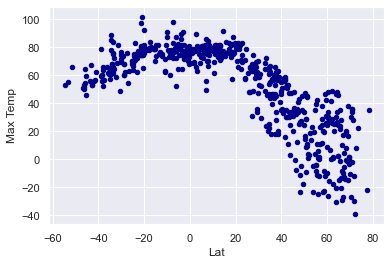

In [15]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Max Temp',
...                       c='DarkBlue',
                                )
# ax1.title("Latitude vs. Temperature (%s)" % time.strftime("%x"))
ax1.grid(True)
plt.savefig('../assets/images/Fig1.png')

## ( lat vs temp ) : 
    *from this plot one can that the closer to the equator (where Lat = 0) the hotter the max temp will be 

## Latitude vs. Humidity Plot

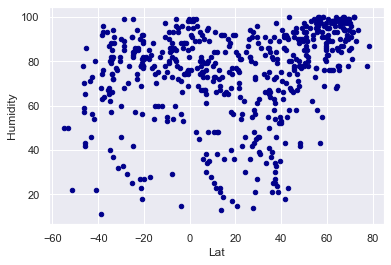

In [17]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Humidity',
...                       c='DarkBlue',
                                )
ax1.grid(True)
plt.savefig('../assets/images/Fig2.png')

## Observation ( lat vs hum ) :

## Latitude vs. Cloudiness Plot

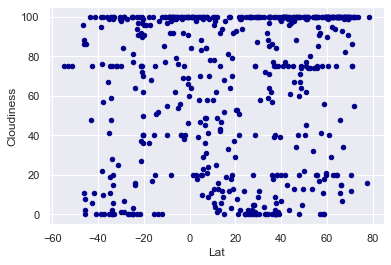

In [18]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Cloudiness',
...                       c='DarkBlue',
                                )
ax1.grid(True)
plt.savefig('../assets/images/Fig3.png')

## ( lat vs clouds ) : 
    *cloudiness seems to be indepedent for most part from latitude (there is no strong correlation)

## Latitude vs. Wind Speed Plot

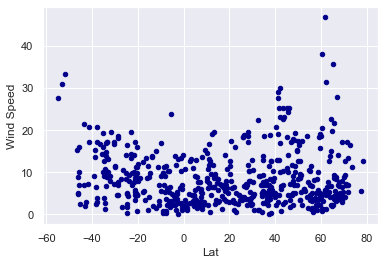

In [19]:
ax1 = sorted_cities.plot.scatter(x='Lat',
...                       y='Wind Speed',
...                       c='DarkBlue',
                                )
ax1.grid(True)
plt.savefig('../assets/images/Fig4.png')

## ( lat vs wind speed ) :
    *like cloudiness also seems to have no strong correlation to latitude

## Linear Regression

In [16]:
# This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude):
north_cities = sorted_cities[sorted_cities['Lat'] >= 0]
south_cities = sorted_cities[sorted_cities['Lat'] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6291491099860176


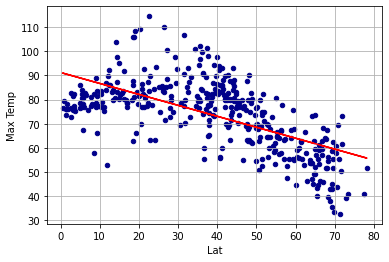

In [17]:
ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Max Temp',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()

ax1.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.savefig('output_data/NorthlatVsMaxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7926937384433805


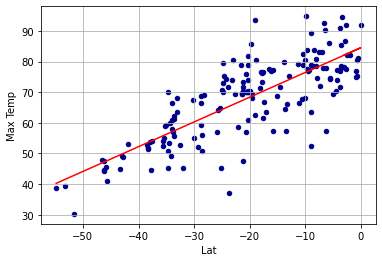

In [18]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Max Temp',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
ax1.annotate(line_eq,(-50.8,0.8),fontsize=15,color="red")
plt.savefig('output_data/SouthlatVsMaxTemp.png')

# Max Temp vs. Latitude Linear Regression :
 * For both north and south hemisphere there is a strong correlation between Lat and Max temp,  if both graphs x-axis were to start at 0 they would have about the same r value. This r vlaue can transalte into the fact that temperature decreases as you move away from 0 latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05606981959634025


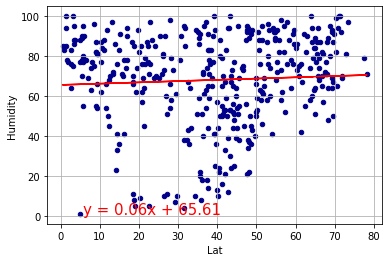

In [19]:

ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Humidity',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Humidity'])
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.savefig('output_data/NorthlatVsHum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.24218485043710475


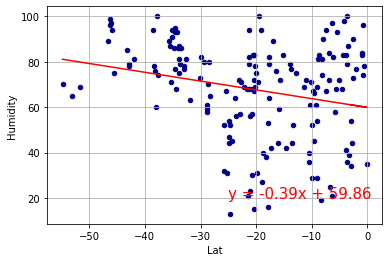

In [20]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Humidity',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Humidity'])
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.savefig('output_data/SouthlatVsHum.png')

# Humidity(%) vs. Latitude Linear Regression :
 * In the Southern hemisphere a stronger correlation between Latitude and Humidity was found. Although it is still low as you approach the equautor or 0 latitude humidity increases.
 ----------------------------------

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.001333126876341253


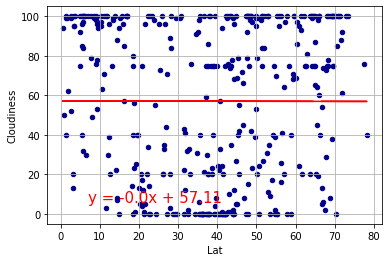

In [21]:
ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Cloudiness',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Cloudiness'])
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(7,5.8),fontsize=15,color="red")
plt.savefig('output_data/NorthlatVsCloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03289763125630871


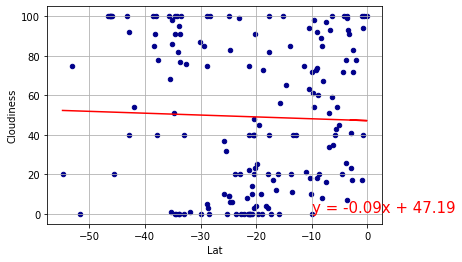

In [22]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Cloudiness',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Cloudiness'])
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(-10,0.8),fontsize=15,color="red")
plt.savefig('output_data/SouthlatVsCloud.png')

# Cloudiness(%) vs. Latitude Linear Regression :
 * There is little to no correlation between latitude and cloudiness in both the southern and northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.055566053976199944


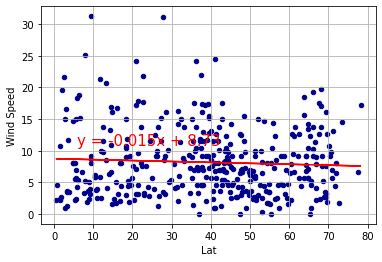

In [23]:
ax1 = north_cities.plot.scatter(x='Lat',
...                       y='Wind Speed',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities['Lat'], north_cities['Wind Speed'])
print(f"The r-value is: {rvalue}")
regress_values = north_cities['Lat'] * slope + intercept
ax1.plot(north_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(5.8,10.8),fontsize=15,color="red")
plt.savefig('output_data/NorthlatVsWind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.005540265298778584


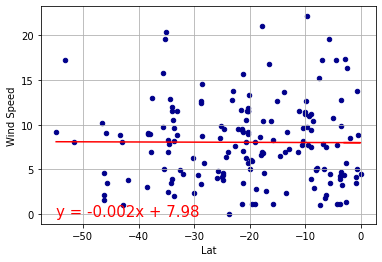

In [24]:
ax1 = south_cities.plot.scatter(x='Lat',
...                       y='Wind Speed',
...                       c='DarkBlue',
                                )
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities['Lat'], south_cities['Wind Speed'])
print(f"The r-value is: {rvalue}")
regress_values = south_cities['Lat'] * slope + intercept
ax1.plot(south_cities['Lat'],regress_values,"r-")
ax1.grid()
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
ax1.annotate(line_eq,(-54.8,-0.2),fontsize=15,color="red")
plt.savefig('output_data/SouthlatVsWind.png')

# Wind Speed (mph) vs. Latitude Linear Regression :
 * There is little to no correlation between wind speed and latitude in both hemipsheres, although the r value is slightly more in the northern hempshere